# Composición de imágenes

**Objetivo**: Aprender cómo componer (pegar) una imagen dentro de otra.

**Conocimientos previos**: Conceptos y procesamiento básicos de imágenes digitales color y escala de grises. Programación en Python con la librería Numpy. Filtrado por color y cálculo de centro de masa de una imagen binaria.

**Importante**: Para que este cuaderno funcione correctamente, las imágenes `guante.jpg` y `fuego.jpg` deben estar en el mismo directorio que este cuaderno.

En este tutorial vamos a ver cómo incrustar una imagen dentro de otra con el objetivo de enriquecer la imagen original. Este proceso puede utilizarse luego para realizar un proceso de realidad aumentada.


<img style="display:inline-block;width:35%;" src="guante.jpg"/> +
<img style="display:inline-block;width:20%;" src="fuego.jpg"/> =
<img style="display:inline-block;width:35%;" src="incrustada.jpg"/>

## Algoritmo de incrustación

El proceso de pegar una imagen dentro de otra no es más que el reemplazo de los píxeles de la imagen original, por los de la imagen a pegar, en el lugar que se desee. Claramente, esto puede realizarse siempre que la imagen a incrustar sea más pequeña que la original. 
Veamos entonces, cómo sería el algoritmo:

```python
pos_ini= esquina superior izquierda donde se pega el objeto
for i in altura de la imagen a incrustar:
    for j in ancho de la imagen a incrustar:
        pos_nueva= (i+pos_ini[0], j + pos_ini[1])      # calcular posición del pixel
        img_orig(pos_nueva)= img_a_incr[i,j] # reemplaar pixel
        
```
Esta versión simplificada del algoritmo tiene un problema. ¿Qué sucede si `i+pos_i` nos genera un valor más grande que los límites de la imagen original? o ¿Qué sucede si al calcular la posición inicial se genera una coordenada menos a cero?
En este caso hay que tomar una decisión política de cómo operar: Generalmente, vamos a querer cortar la imagen nueva y colocar solo la parte que se verá. Esto lo podemos solucionar con algunos condicionales.

```python
pos_ini= esquina superior izquierda donde se pega el objeto
for i in altura de la imagen a incrustar:
    for j in ancho de la imagen a incrustar:
        pos_nueva= (i+pos_ini[0], j + pos_ini[1])   # calcular posición del pixel
        if (pos_nueva > 0) & (pos_nueva < tamaño de la imagen original) 
            img_orig(pos_nueva)= img_a_incr[i,j] # reemplazar pixel
```



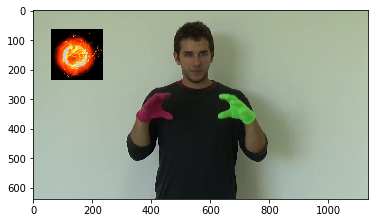

In [6]:
import skimage.io # para abrir imagenes
import numpy as np  # procesamiento matricial
import matplotlib.pyplot as plt  # para mostrar imagenes
%matplotlib inline

def dibujar_objeto_en_imagen_V1(img, objeto, posicion):
    # dibuja el objeto pasado como argumento en la imagen "img"
    # se espera que el objeto tenga como fondo el color negro
    # el CENTRO del objeto debe ubicarse en `posición`
    # (no su esquina superior izquierda)
    # es decir, pos_ini del pseudocódigo de arriba NO es posicion
    
    # tamaños y coordenadas
    h_obj, w_obj, c= objeto.shape
    h_img, w_img, c= img.shape
    #IMPLEMENTAR - COMIENZO
    pos_ini= np.array(posicion) - np.array((h_obj, w_obj))//2 # se divide por 2 ya que el centro de la imagen 
                                                                          # se ubica en la posición pasada como argumento
    #IMPLEMENTAR - FIN
    for i in range(h_obj):
        for j in range(w_obj):
            #IMPLEMENTAR - COMIENZO
            pos_nueva= pos_ini + (i,j)
            # verificamos que la nueva posición sea un índice válido de la imagen
            if pos_nueva[0]>0 and pos_nueva[1]>0 and pos_nueva[0]<h_img and pos_nueva[1]<w_img: 
                img[pos_nueva[0], pos_nueva[1],:]= objeto[i,j,:] # cambiamos el pixel por el del objeto
            #IMPLEMENTAR - FIN

#Probemos la función definida previamente colocando 
#la imagen `fuego.jpg` en la imagen `guante.jpg`.
img_original= skimage.io.imread("guante.jpg") /255
img_objeto= skimage.io.imread("fuego.jpg") /255

#Como es una prueba, las coordenadas donde se va a ubicar la imagen `fuego.jpg` 
#las definimos de manera arbitraria como (150,150).            
coordenada= (150,150)

dibujar_objeto_en_imagen_V1(img_original, img_objeto, coordenada) # recordar que en python los parámetros pasan por referencia
plt.imshow(img_original)

### Removiendo el fondo negro de la imagen `fuego.jpg`
Notemos que la imagen tiene una figura y un fondo. En este caso, la figura tiene colores anaranjados y el fondo es claramente negro (u oscuro). 

Podemos entonces "quitar" ese fondo, para pegar únicamente la figura. 

¿Cómo podemos hacer eso? Una forma rápida sería decidir qué pixeles cambiar en base a si tienen color negro o no, o para ser más robusto, si son muy oscuros o no.

<img style="display:inline-block;width:35%;" src="guante.jpg"/> +
<img style="display:inline-block;width:20%;" src="fuego.jpg"/> =
<img style="display:inline-block;width:35%;" src="incrustada2.jpg"/>

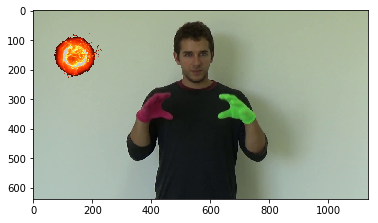

In [7]:
def dibujar_objeto_en_imagen_V2(img, objeto, posicion):
    # dibuja el objeto pasado como argumento en la imagen "img"
    # se espera que el objeto tenga como fondo el color negro
    # el CENTRO del objeto debe ubicarse en `posición`
    # (no su esquina superior izquierda)
    # es decir, pos_ini del pseudocódigo de arriba NO es posicion
    
    # tamaños y coordenadas
    h_obj, w_obj, c= objeto.shape
    h_img, w_img, c= img.shape
    #IMPLEMENTAR - COMIENZO
    pos_ini= np.array(posicion) - np.array([h_obj, w_obj])//2 # se divide por 2 ya que el centro de la imagen 
    #IMPLEMENTAR - FIN

    for i in range(h_obj):
        for j in range(w_obj):
            #IMPLEMENTAR - COMIENZO
            intensidad=np.mean(objeto[i,j]) # intensidad luminica del pixel
            if intensidad>0.1:  # si el pixel es "claro", lo cambio
                pos_nueva= pos_ini + (i,j)
                # verificamos que la nueva posición sea un índice válido de la imagen
                if pos_nueva[0]>0 and pos_nueva[1]>0 and pos_nueva[0]<h_img and pos_nueva[1]<w_img:
                    img[pos_nueva[0], pos_nueva[1],:]= objeto[i,j,:] # cambiamos el pixel por el del objeto
            #IMPLEMENTAR - FIN
                    
img_original= skimage.io.imread("guante.jpg") /255
img_objeto= skimage.io.imread("fuego.jpg") /255
coordenada= (150,150)

dibujar_objeto_en_imagen_V2(img_original, img_objeto, coordenada) # recordar que en python los parámetros pasan por referencia
plt.imshow(img_original)            

### Otras mejoras

Si bien el resultado es aceptable, la composición no es perfecta. Para hacerla mejor, deberíamos utilizar una imagen de un objeto que tenga un canal de transparencia, e implementar un algoritmo de [alpha blending](https://en.wikipedia.org/wiki/Alpha_compositing#Alpha_blending) como las ecuaciones de Porter y Duff. Por cuestiones de tiempo no vamos a ahondar en eso, pero es un proyecto simple y divertido si quieren continuar estudiando estos temas.


Otra opción es utilizar un "color de fondo", una técnica muy utilizada en juegos viejos en donde guardar un canal extra de transparencia era costoso y también en el cine con los típicos fondos verdes. En ese caso, se elige un color particular que no se use normalmente (como un verde o violeta fluo), que se designa como color de fondo, y solo se copian los pixeles que no son iguales a ese pixel en particular.